### Heart Disease Analysis Project

In [ ]:
#importing necessary datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [3]:
labels = pd.read_csv('labels.csv')
values = pd.read_csv('values.csv')
df = pd.concat([labels, values], axis=1)
df = df.loc[:, ~df.columns.duplicated()]  # Remove duplicate columns

In [4]:
# Data Overview
print("Data Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    object 
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  s

In [5]:
df.head()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [6]:
# Identify and display non-numeric entries in object columns
for col in df.columns:
    if df[col].dtype == 'object':
        non_numeric_vals = df[col][~df[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()]
        if not non_numeric_vals.empty:
            print(f"\nNon-numeric entries in '{col}': {non_numeric_vals.unique()}")


Non-numeric entries in 'patient_id': ['0z64un' 'ryoo3j' 'yt1s1x' 'l2xjde' 'oyt4ek' 'ldukkw' '2gbyh9' 'daa9kp'
 '3nwy2n' '1r508r' 'ldg4b9' 'xc17yq' 'mpggsq' 'zlyac8' 'f06u72' '2fv3rc'
 'qyrkxn' '237mql' 'mc750a' '30v796' 'cvux3j' 'k8899q' 'jhdvtb' '5g9v0h'
 '83asqd' 'gla0im' 'zzmfh7' 'f4g1ay' 'lek9q9' '8265rl' '6017a1' 'z7xkou'
 'k7ef7h' '0n5fu0' '55xksg' 'pjgqa3' 'xkdz7j' 'tpuevg' 'ascl42' '1xwoe6'
 'ty4ik8' 'gx6yxl' 'hlmts5' 'yx0q6k' 'ep1o51' 'gj1e5z' '6219kl' 'rp9g6x'
 '1aeaff' 'y3prof' '3drd48' 'ejo7p3' 'r7y4i1' 'mznwxv' '27oevk' 'jwqi3k'
 '328lkl' 'tlk9o8' 'aq2vrq' 'ilogfb' 'rv6siv' 'm2a4i9' 'pwigd8' 'qwapdq'
 '4sd1xn' 'nck22c' 'm6zksp' 'f70grj' 'k1art8' 'mcwqgs' '3jsjqk' 'ik7hfs'
 'qwj1yf' 'qvhk9e' 'igwnqo' '4v0q7o' 'hh2awp' 'vfjppl' '6lu42b' 'shiro4'
 '3wl3z4' 'ebioez' '37c0vm' 'v52zcs' '6nkcaw' 'hfp05i' 'grfxwd' 'bvcxah'
 'i49srr' '93dbhq' 'jscmp8' 'zaytyf' 'wze8qm' 'w3933i' '7uch9x' 'dy5hxt'
 'c0gkqc' 'z5g5p3' 'h3uzv8' 'bthqr4' 'rfj25e' '9f92et' '24fopx' 'ldr1mz'
 'wokyol' 'p5

In [7]:
# Encode categorical 'thal' column if exists
if 'thal' in df.columns:
    le = LabelEncoder()
    df['thal'] = le.fit_transform(df['thal'].astype(str))
    print(f"\nEncoded 'thal' classes: {df['thal'].unique()}")


Encoded 'thal' classes: [1 2 0]


In [8]:
# Convert columns to numeric where applicable, coercing errors to NaN
for col in df.columns:
    if col not in ['patient_id', 'heart_disease_present']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
df.head()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [10]:
# Remove rows with NaN values caused by conversion errors
rows_before = df.shape[0]
df.dropna(inplace=True)
rows_after = df.shape[0]
print(f"\nRemoved {rows_before - rows_after} rows due to invalid data.")


Removed 0 rows due to invalid data.


In [11]:
# Check missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
patient_id                              0
heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64


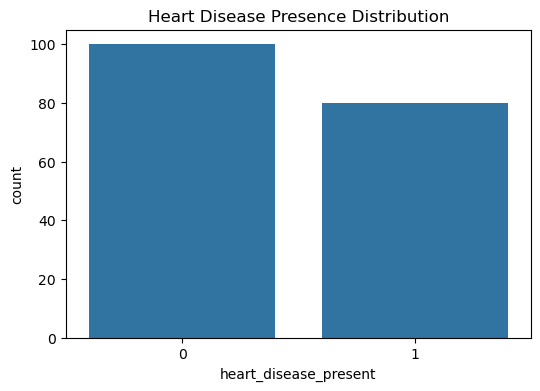

In [12]:
# Visualize target class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='heart_disease_present', data=df)
plt.title('Heart Disease Presence Distribution')
plt.show()

In [20]:
df_numeric = df.drop(['patient_id'], axis=1)

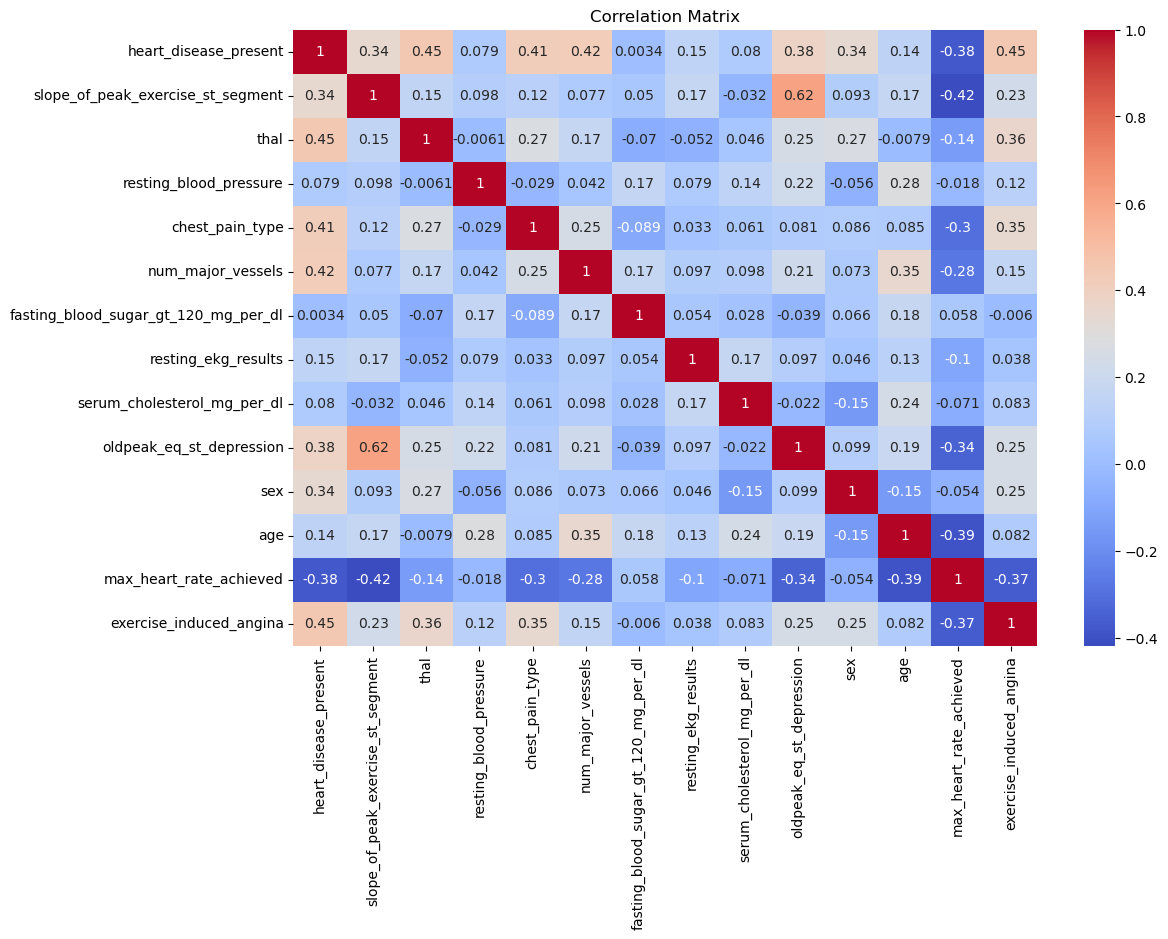

In [22]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Prepare features and target variable
X = df.drop(['patient_id', 'heart_disease_present'], axis=1)
y = df['heart_disease_present']

In [26]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# Model 1: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



Random Forest Results:
Accuracy: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



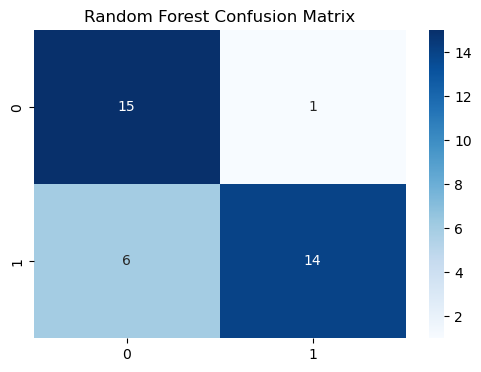

Random Forest ROC-AUC score: 0.8812500000000001


In [32]:
# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC-AUC Score for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print("Random Forest ROC-AUC score:", rf_roc_auc)